In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
#Parameters


#MACD parameters
n = 9
m = 19
t = 6

#RSI parameters
period = 14

In [19]:
dataimport = pd.read_csv('/Users/vedantgupta/Documents/project /summer project(finance)/Pair-Trading--ML-TI-/data/Sensex.csv')


dataimport['Date'] = pd.to_datetime(dataimport['Date'])
dataimport.set_index('Date', inplace=True)
data = dataimport.copy()

data.reset_index(inplace=True)
data['Date'] = data['Date'].astype(str)
stock_names = data.columns[1:]

datacopy = data.copy()

data

,Date,KMB IB Equity,HCLT IB Equity,NTPC IB Equity,NEST IB Equity,BHARTI IB Equity,RELIANCE IB Equity,TCS IB Equity,ITC IB Equity,MM IB Equity,...,HDFCB IB Equity,ICICIBC IB Equity,APNT IB Equity,SBIN IB Equity,TTAN IB Equity,TTMT IB Equity,IIB IB Equity,JSTL IB Equity,LT IB Equity,AXSB IB Equity
0,2011-01-03,227.88,113.63,165.04,3829.15,323.87,475.67,579.78,116.23,393.53,...,239.05,207.93,287.49,282.09,184.12,258.52,264.80,119.17,879.84,273.52
1,2011-01-04,229.93,115.20,166.63,3894.70,320.22,485.78,571.88,118.30,390.10,...,234.34,200.75,283.79,273.36,182.89,257.34,255.65,116.91,876.09,269.48
2,2011-01-05,223.95,117.79,165.92,3897.55,315.35,484.58,579.03,119.93,385.53,...,230.64,194.56,286.79,269.73,182.01,253.76,248.95,114.76,857.98,262.17
3,2011-01-06,222.58,119.29,168.13,3842.15,318.37,489.14,587.10,119.10,384.95,...,232.69,191.46,284.63,262.52,178.70,249.14,244.35,109.93,834.44,261.48
4,2011-01-07,217.28,116.28,164.08,3781.85,305.26,480.52,570.80,115.00,369.30,...,226.84,190.55,277.41,259.99,170.76,235.38,231.40,103.27,821.20,256.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,2022-12-26,1811.70,1031.25,165.55,19896.05,811.20,2299.89,3255.85,334.55,1236.70,...,1628.15,892.40,3057.50,596.75,2481.75,384.85,1195.20,732.55,2087.90,928.75
3126,2022-12-27,1820.50,1036.45,165.05,19779.85,814.75,2318.61,3259.05,333.05,1232.60,...,1630.65,900.65,3109.80,601.85,2503.65,394.15,1202.40,764.65,2123.75,932.55
3127,2022-12-28,1820.25,1035.35,165.70,19850.60,803.45,2318.06,3256.30,334.50,1251.95,...,1629.45,898.70,3124.00,601.20,2581.20,391.40,1214.15,761.10,2120.80,924.95
3128,2022-12-29,1818.20,1044.50,166.65,19822.10,819.45,2316.33,3269.25,335.25,1261.80,...,1640.90,906.70,3115.30,612.30,2552.70,385.90,1230.95,769.50,2110.60,935.00


In [20]:
def MACD(price_data, short_window, long_window, signal_window, column_name):
    data = price_data
   
    data.loc[:,'EMAn'] = data[column_name].ewm(span=short_window, adjust=False).mean()
    data.loc[:,'EMAm'] = data[column_name].ewm(span=long_window, adjust=False).mean()

    for i in range(short_window):
        data.loc[i,'EMAn'] = None
    for i in range(long_window):
        data.loc[i,'EMAm'] = None
    
    data['MACD'] = data['EMAn'] - data['EMAm']
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    trade_sig=np.zeros([len(data),1],dtype=float)

    for i in range(long_window+1,len(data)):
        if data.loc[i,'MACD'] > data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] < data.loc[i-1,'Signal Line']:
            trade_sig[i] = 1
        if data.loc[i,'MACD'] < data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] > data.loc[i-1,'Signal Line']:
            trade_sig[i] = -1
        
    trade_sig=trade_sig.reshape(len(trade_sig),1)

    data_numpy=data['Date'].to_numpy()
    data_numpy=data_numpy.reshape(len(data_numpy),1)
    data_numpy=np.column_stack((data_numpy,data[column_name].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAn'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAm'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['MACD'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['Signal Line'].to_numpy()))

    final=np.column_stack((data_numpy,trade_sig))
    final_df=pd.DataFrame(final,columns=['Date','Close','EMAn','EMAm','MACD','Signal Line','Trade Signal'],index=data.index)

    final_df.drop(["EMAn","EMAm","MACD","Signal Line"],axis=1,inplace=True)
    final_df['Date'] = pd.to_datetime(final_df['Date'])
    final_df['Close'] = final_df['Close'].astype(float) 
    final_df['Trade Signal'] = final_df['Trade Signal'].astype(int)

    return final_df


master_macd = pd.DataFrame()

for name in stock_names:
    temp = MACD(data, n, m, t, name)
    temp = temp[['Date','Trade Signal']]
    temp.columns = ['Date',name]
    temp.set_index('Date', inplace=True)
    master_macd = pd.concat([master_macd, temp], axis=1)

In [21]:
master_macd.insert(0, 'Date', master_macd.index)
master_macd.reset_index(drop=True, inplace=True)
master_macd = master_macd[period:]
master_macd = master_macd.reset_index(drop=True)
#master_macd = master_macd[232:725]
master_macd

,Date,KMB IB Equity,HCLT IB Equity,NTPC IB Equity,NEST IB Equity,BHARTI IB Equity,RELIANCE IB Equity,TCS IB Equity,ITC IB Equity,MM IB Equity,...,HDFCB IB Equity,ICICIBC IB Equity,APNT IB Equity,SBIN IB Equity,TTAN IB Equity,TTMT IB Equity,IIB IB Equity,JSTL IB Equity,LT IB Equity,AXSB IB Equity
0,2011-01-21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,2022-12-26,0,0,0,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3112,2022-12-27,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3113,2022-12-28,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3114,2022-12-29,1,0,0,0,0,0,1,1,1,...,0,1,0,1,0,0,1,0,0,0


In [22]:
def calculate_rsi(prices, period):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(com=period - 1, min_periods=period).mean()
    avg_loss = loss.ewm(com=period - 1, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def generate_signals(rsi_values):
    signals = np.zeros(rsi_values.shape)
    for rsi in rsi_values:
        if rsi < 30:
            signals[rsi_values == rsi] = 1
        elif rsi > 70:
            signals[rsi_values == rsi] = -1
    return signals

rsi_values = pd.DataFrame()
rsi_values['Date'] = data['Date']
for stock in stock_names:
    rsi_values[stock] = calculate_rsi(data[stock], period)

master_rsi = rsi_values[period:]

In [23]:
#master_rsi = master_rsi[232:725]
master_rsi = master_rsi.reset_index(drop=True)
master_rsi

,Date,KMB IB Equity,HCLT IB Equity,NTPC IB Equity,NEST IB Equity,BHARTI IB Equity,RELIANCE IB Equity,TCS IB Equity,ITC IB Equity,MM IB Equity,...,HDFCB IB Equity,ICICIBC IB Equity,APNT IB Equity,SBIN IB Equity,TTAN IB Equity,TTMT IB Equity,IIB IB Equity,JSTL IB Equity,LT IB Equity,AXSB IB Equity
0,2011-01-21,36.622381,66.678475,37.432056,27.648854,30.734147,32.047928,65.500550,39.086813,54.857181,...,31.503174,47.331650,26.472866,42.417123,46.106455,34.663125,38.908784,36.616684,5.901379,43.997617
1,2011-01-24,37.767465,69.870415,47.129265,38.483290,28.370972,28.232684,62.913996,39.086813,63.309430,...,39.617989,52.139734,22.672144,52.840154,52.750710,34.622200,44.400479,41.155079,11.883363,52.571468
2,2011-01-25,33.032671,70.468061,56.511570,33.192224,34.314529,25.579068,57.835727,37.198625,52.398753,...,34.231317,41.762642,20.805393,51.388076,54.193265,30.297981,39.831576,38.501124,14.921853,47.577710
3,2011-01-26,33.032671,70.468061,56.511570,33.192224,34.314529,25.579068,57.835727,37.198625,52.398753,...,34.231317,41.762642,20.805393,51.388076,54.193265,30.297981,39.831576,38.501124,14.921853,47.577710
4,2011-01-27,26.885983,67.080589,52.564388,27.713912,25.256219,22.526979,59.818307,36.885515,36.810880,...,31.411320,37.690818,20.940205,48.508885,50.934642,41.172521,34.163977,31.708342,13.413666,47.769510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,2022-12-26,31.648395,38.921531,41.075653,47.078317,41.434247,39.129728,45.421136,44.843882,42.637816,...,55.717482,40.017617,39.335929,47.863829,33.891615,29.755946,50.791686,50.448334,47.262058,56.955503
3112,2022-12-27,35.027652,41.338090,40.132463,44.730925,43.661784,42.718964,45.848247,43.278486,41.749327,...,56.376283,44.746318,48.390096,50.498948,39.193031,37.979470,52.274533,63.535046,53.625168,58.286345
3113,2022-12-28,34.974751,40.968826,41.997092,46.480692,38.625707,42.639412,45.518582,45.267456,47.327858,...,55.946037,43.866056,50.548191,50.151036,53.433677,36.614461,54.674948,61.597537,53.057867,54.647262
3114,2022-12-29,34.514433,45.342527,44.707664,45.850969,47.805661,42.372126,47.435329,46.316039,49.955207,...,59.149550,48.354800,49.191007,55.756715,48.901124,33.983754,57.932831,64.366543,51.047024,58.350426


In [24]:
prices = datacopy
prices = prices[period:]
prices = prices.reset_index(drop=True)
prices

,Date,KMB IB Equity,HCLT IB Equity,NTPC IB Equity,NEST IB Equity,BHARTI IB Equity,RELIANCE IB Equity,TCS IB Equity,ITC IB Equity,MM IB Equity,...,HDFCB IB Equity,ICICIBC IB Equity,APNT IB Equity,SBIN IB Equity,TTAN IB Equity,TTMT IB Equity,IIB IB Equity,JSTL IB Equity,LT IB Equity,AXSB IB Equity
0,2011-01-21,206.95,124.80,158.00,3625.15,303.36,445.14,606.30,112.63,385.53,...,209.86,193.79,266.09,259.79,175.11,235.12,232.65,101.42,732.91,256.88
1,2011-01-24,207.55,126.89,160.29,3681.50,300.88,438.17,602.90,112.63,394.10,...,214.83,197.07,262.23,269.31,178.82,235.08,238.60,103.40,738.91,264.42
2,2011-01-25,203.13,127.30,163.25,3625.80,303.59,432.53,595.88,111.97,385.25,...,208.70,188.78,259.99,267.93,179.70,230.59,231.55,101.63,742.04,259.62
3,2011-01-26,203.13,127.30,163.25,3625.80,303.59,432.53,595.88,111.97,385.25,...,208.70,188.78,259.99,267.93,179.70,230.59,231.55,101.63,742.04,259.62
4,2011-01-27,196.18,126.40,162.17,3556.75,293.49,425.52,599.58,111.87,366.50,...,205.21,184.90,260.03,265.36,178.11,236.32,221.75,96.56,733.24,259.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,2022-12-26,1811.70,1031.25,165.55,19896.05,811.20,2299.89,3255.85,334.55,1236.70,...,1628.15,892.40,3057.50,596.75,2481.75,384.85,1195.20,732.55,2087.90,928.75
3112,2022-12-27,1820.50,1036.45,165.05,19779.85,814.75,2318.61,3259.05,333.05,1232.60,...,1630.65,900.65,3109.80,601.85,2503.65,394.15,1202.40,764.65,2123.75,932.55
3113,2022-12-28,1820.25,1035.35,165.70,19850.60,803.45,2318.06,3256.30,334.50,1251.95,...,1629.45,898.70,3124.00,601.20,2581.20,391.40,1214.15,761.10,2120.80,924.95
3114,2022-12-29,1818.20,1044.50,166.65,19822.10,819.45,2316.33,3269.25,335.25,1261.80,...,1640.90,906.70,3115.30,612.30,2552.70,385.90,1230.95,769.50,2110.60,935.00


In [25]:
def get_returns(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    tradesheet = pd.DataFrame(columns=['Date','Buy Stock','Sell Stock','Buy Price','Sell Price','Buy Quantity','Sell Quantity','Profit'])
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_macd.iloc[i,j]==1):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_macd.iloc[i,j]==-1):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            row = pd.DataFrame({'Date':prices.iloc[i,0],'Buy Stock':prices.columns[intrade[0][3]],'Sell Stock':prices.columns[intrade[0][1]],'Buy Price':s2,'Sell Price':b2,'Buy Quantity':1,'Sell Quantity':intrade[0][2],'Profit':r},index=[0])
            tradesheet = pd.concat([tradesheet,row],ignore_index=True)
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            row = pd.DataFrame({'Date':prices.iloc[i,0],'Buy Stock':prices.columns[buy],'Sell Stock':prices.columns[sell],'Buy Price':prices.iloc[i,buy],'Sell Price':prices.iloc[i,sell],'Buy Quantity':buy_quantity,'Sell Quantity':float(1),'Profit':0},index=[0])
            tradesheet = pd.concat([tradesheet,row],ignore_index=True)
            intrade.append(l)
        
        i = i+1

    return returns, intrade, tradesheet

    

In [26]:
returns,intrade, tradesheet = get_returns(master_macd, master_rsi, prices)

/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_41828/1179191895.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tradesheet = pd.concat([tradesheet,row],ignore_index=True)


In [27]:
tradesheet.to_csv('/Users/vedantgupta/Documents/project /summer project(finance)/Pair-Trading--ML-TI-/tradesheets/Sensex/Without Clustering/Daily MACD+RSI Sensex.csv',index=False)
tradesheet


,Date,Buy Stock,Sell Stock,Buy Price,Sell Price,Buy Quantity,Sell Quantity,Profit
0,2011-02-02,UTCEM IB Equity,MSIL IB Equity,1000.25,1215.85,1.215546,1.000000,0
1,2011-02-03,MSIL IB Equity,UTCEM IB Equity,1218.85,1003.00,1.000000,1.215546,0.342752
2,2011-02-04,BAF IB Equity,ICICIBC IB Equity,57.59,181.18,3.146032,1.000000,0
3,2011-02-07,ICICIBC IB Equity,BAF IB Equity,178.24,57.95,1.000000,3.146032,4.072572
4,2011-02-08,APNT IB Equity,TATA IB Equity,247.29,58.12,0.235028,1.000000,0
...,...,...,...,...,...,...,...,...
2295,2022-12-12,UTCEM IB Equity,TTAN IB Equity,7142.55,2583.00,1.000000,2.709402,-144.163696
2296,2022-12-14,SBIN IB Equity,APNT IB Equity,625.55,3147.85,5.032132,1.000000,0
2297,2022-12-15,APNT IB Equity,SBIN IB Equity,3129.40,615.50,1.000000,5.032132,-32.122924
2298,2022-12-20,ITC IB Equity,LT IB Equity,340.05,2163.05,6.360976,1.000000,0


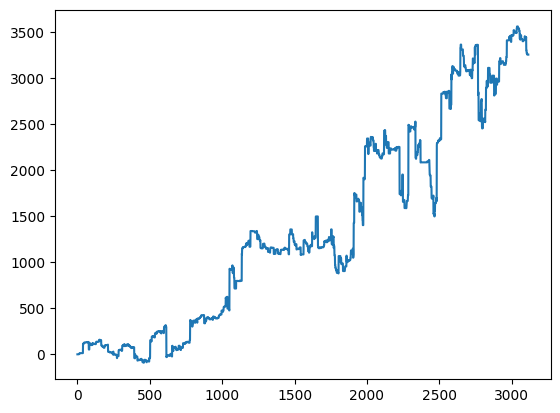

In [28]:
cumulative_returns = np.cumsum(returns)
plt.plot(cumulative_returns)
plt.savefig('/Users/vedantgupta/Documents/project /summer project(finance)/Pair-Trading--ML-TI-/Plots/Sensex Without Clustering  Daily MACD+RSI.png')
plt.show()

In [29]:
def get_returns1(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    tradesheet = pd.DataFrame(columns=['Date','Buy Stock','Sell Stock','Buy Price','Sell Price','Buy Quantity','Sell Quantity','Profit'])
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_rsi.iloc[i,j]<30):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_rsi.iloc[i,j]>70):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            row = pd.DataFrame({'Date':prices.iloc[i,0],'Buy Stock':prices.columns[intrade[0][3]],'Sell Stock':prices.columns[intrade[0][1]],'Buy Price':s2,'Sell Price':b2,'Buy Quantity':1,'Sell Quantity':intrade[0][2],'Profit':r},index=[0])
            tradesheet = pd.concat([tradesheet,row],ignore_index=True)
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            row = pd.DataFrame({'Date':prices.iloc[i,0],'Buy Stock':prices.columns[buy],'Sell Stock':prices.columns[sell],'Buy Price':prices.iloc[i,buy],'Sell Price':prices.iloc[i,sell],'Buy Quantity':buy_quantity,'Sell Quantity':float(1),'Profit':0},index=[0])
            tradesheet = pd.concat([tradesheet,row],ignore_index=True)
            intrade.append(l)
        
        i = i+1

    return returns, intrade, tradesheet

In [30]:
returns1,intrade1, tradesheet1 = get_returns1(master_macd, master_rsi, prices)

/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_41828/2907237359.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tradesheet = pd.concat([tradesheet,row],ignore_index=True)


In [31]:
tradesheet1.to_csv('/Users/vedantgupta/Documents/project /summer project(finance)/Pair-Trading--ML-TI-/tradesheets/Sensex/Without Clustering/Daily RSI Sensex.csv',index=False)
tradesheet1

,Date,Buy Stock,Sell Stock,Buy Price,Sell Price,Buy Quantity,Sell Quantity,Profit
0,2011-01-25,HUVR IB Equity,HCLT IB Equity,281.65,127.30,0.451979,1.000000,0
1,2011-01-26,HCLT IB Equity,HUVR IB Equity,127.30,281.65,1.000000,0.451979,0.0
2,2011-01-26,HUVR IB Equity,HCLT IB Equity,281.65,127.30,0.451979,1.000000,0
3,2011-01-27,HCLT IB Equity,HUVR IB Equity,126.40,271.00,1.000000,0.451979,-3.913581
4,2011-05-03,AXSB IB Equity,APNT IB Equity,246.14,276.41,1.122979,1.000000,0
...,...,...,...,...,...,...,...,...
1047,2022-11-23,HCLT IB Equity,BAF IB Equity,1102.40,6779.60,1.000000,0.165107,16.961362
1048,2022-12-09,BAF IB Equity,AXSB IB Equity,6517.65,933.70,0.143257,1.000000,0
1049,2022-12-12,AXSB IB Equity,BAF IB Equity,938.85,6506.10,1.000000,0.143257,-6.80462
1050,2022-12-12,BAF IB Equity,AXSB IB Equity,6506.10,938.85,0.144303,1.000000,0


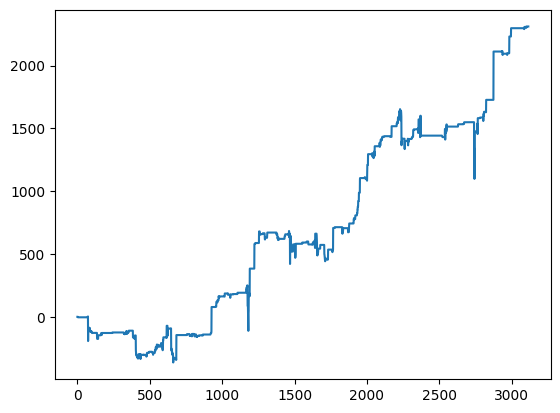

In [32]:
cumulative_returns = np.cumsum(returns1)
plt.plot(cumulative_returns)
plt.savefig('/Users/vedantgupta/Documents/project /summer project(finance)/Pair-Trading--ML-TI-/Plots/Sensex Without Clustering  Daily RSI.png')
plt.show()